In [1]:
#dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [5]:
session = Session(engine)

In [6]:
meas_first = session.query(Measurements).first()
meas_first

In [7]:
meas_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1114a2080>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [8]:
#Query database for precipitation information for the last 12 months

rain = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= "2016-08-23").\
       group_by(Measurements.date).all()
rain

[('2016-12-01', 0.72),
 ('2016-12-02', 1.27),
 ('2016-12-03', 1.62),
 ('2016-12-04', 0.31),
 ('2016-12-05', 1.6),
 ('2016-12-06', 0.0),
 ('2016-12-07', 0.02),
 ('2016-12-08', 0.03),
 ('2016-12-09', 0.42),
 ('2016-12-10', 0.04),
 ('2016-12-11', 0.13),
 ('2016-12-12', 0.01),
 ('2016-12-13', 0.09),
 ('2016-12-14', 0.33),
 ('2016-12-15', 0.03),
 ('2016-12-16', 0.0),
 ('2016-12-17', 0.07),
 ('2016-12-18', None),
 ('2016-12-19', 0.15),
 ('2016-12-20', 0.0),
 ('2016-12-21', 0.55),
 ('2016-12-22', 1.24),
 ('2016-12-23', 0.83),
 ('2016-12-24', 1.08),
 ('2016-12-25', 0.38),
 ('2016-12-26', 1.48),
 ('2016-12-27', 0.14),
 ('2016-12-28', 0.14),
 ('2016-12-29', 1.03),
 ('2016-12-30', 2.37),
 ('2016-12-31', 0.9),
 ('2017-01-01', 0.03),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('

In [9]:
#Create a Data Frame using Pandas for the last 12 months of precipitation.

rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2016-12-01,0.72
1,2016-12-02,1.27
2,2016-12-03,1.62
3,2016-12-04,0.31
4,2016-12-05,1.60


In [10]:
#Set the index to "date".

rain_2017_df = rain_df.set_index("date")
rain_2017_df.head()

,prcp
date,
2016-12-01,0.72
2016-12-02,1.27
2016-12-03,1.62
2016-12-04,0.31
2016-12-05,1.60


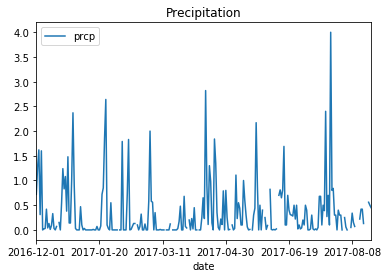

In [38]:
#Plot the precipitation over the last 12 months.

rain_2017_df.plot()

#Set plot title.
plt.title("Precipitation")

#Save graph.
plt.savefig("Precipitation")

#Show graph.

plt.show()

In [12]:
#Total precipitation over the last 12 months.

total_rain = rain_2017_df["prcp"].sum()
total_rain

86.830000000000013

In [13]:
#Display a statistical overview of the rainfall over the past 12 months.

rain_stats = rain_2017_df.describe()
rain_stats

,prcp
count,247.000000
mean,0.351538
std,0.567978
min,0.000000
25%,0.000000
50%,0.100000
75%,0.475000
max,4.000000


In [14]:
# Set stations_first as a variable.

stations_first = session.query(Stations).first()
stations_first

In [15]:
#Show the first row of the stations table.

stations_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1137804e0>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'location': 'POINT(21.2716 -157.8168)',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [16]:
#Calculate the total number of stations.

total_stations = session.query(Stations.station).count()
total_stations

9

In [41]:
#Find the most active stations.

active_station = session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
        
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
most_active = active_station[0][0]
most_active

'USC00519281'

In [49]:
tobs = session.query(Measurements.tobs).filter(Measurements.date >= "2016-08-23", Measurements.station == most_active).all()
       
tobs

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [50]:
tobs_df = pd.DataFrame(tobs)
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


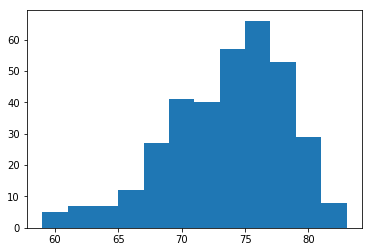

In [51]:
plt.hist(tobs_df["tobs"], bins=12)

plt.show()

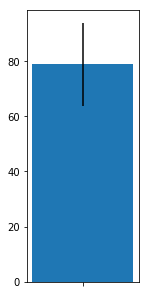

In [65]:
def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date >= start_date,\
         Measurements.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = trip_dates_df["tobs"].max()
    min_temp = trip_dates_df["tobs"].min()
    mean_temp = trip_dates_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.show()
calc_temps("2017-08-03", "2017-08-19")
